In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [5]:
from timeit import default_timer as timer

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


**(a) [3 marks] Write code to read the dataset in Data Q1.txt into two numpy arrays: X and y containing
the features and labels respectively.**

In [7]:
with open("Data_Q1.txt", "r") as f:
  data = f.readlines()

In [8]:
labels=[]
features=[]

for line in data:
  line_list=line.split()
  labels.append(int(line_list[0]))
  for j in line_list[1:]:
    features.append(int(j.split(':')[0]))
    
features=np.array(features)
labels_array=np.unique(np.array(labels))
features_array=np.unique(features)
print(features_array)
dictionary_count={}
for i in labels_array:
  dictionary_count[i]=labels.count(i)
print(dictionary_count)  




[    1     2     3 ... 54875 54876 54877]
{-1: 1933, 1: 2210}


In [9]:
print("X_array = ",labels_array)
print("y_array = ",features_array)

X_array =  [-1  1]
y_array =  [    1     2     3 ... 54875 54876 54877]


***Print the number of classes in the data set and the number of samples belonging to
each class. Indicate if there is class imbalance issue.***

In [10]:
print('NO. of classes in dataset=',len(labels_array))
print('NO. of features in dataset=',len(features_array))
print('NO. of samples belonging to class ',labels_array[0],'is ',dictionary_count[labels_array[0]])
print('NO. of samples belonging to class ',labels_array[1],'is ',dictionary_count[labels_array[1]])



NO. of classes in dataset= 2
NO. of features in dataset= 54877
NO. of samples belonging to class  -1 is  1933
NO. of samples belonging to class  1 is  2210


In [11]:
datafra=pd.DataFrame(labels,columns=['x'])

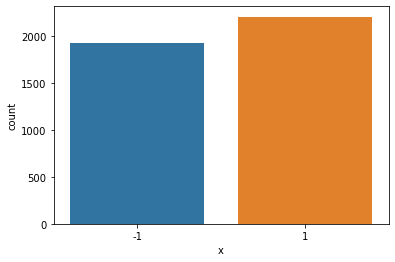

In [12]:
plot=sns.countplot(x='x',data=datafra)


*** Here classes are not imbalance.***

***Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if set T1 and set T2 have similar class label proportions.***

In [13]:
n=len(data)
d=len(features_array)

In [14]:
array=np.array([0 for i in range(n*(d+1))]).reshape(n,(d+1))
array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:

for i in range(len(data)):
  each_line=data[i].split()
  array[i,0]=int(each_line[0])
  for j in each_line[1:]:
    a=j.split(':')
    array[i,int(a[0])]=int(a[1])
array   


array([[ 1,  1,  1, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  1,  1,  1],
       [ 1,  0,  0, ...,  0,  0,  0]])

In [16]:
df=pd.DataFrame(array,columns=['label']+list(features_array))
data=df.copy()

In [17]:
data

label  1  2  3  4  5  6  7  8  9  ...  54868  54869  54870  54871  \
0         1  1  1  1  1  1  1  1  1  1  ...      0      0      0      0   
1        -1  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
2        -1  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
3        -1  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
4        -1  0  0  0  0  0  0  0  1  1  ...      0      0      0      0   
...     ... .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...   
4138     -1  0  0  0  0  0  0  0  1  0  ...      0      0      0      0   
4139      1  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
4140      1  0  0  0  0  0  0  0  1  0  ...      0      0      0      0   
4141     -1  0  0  0  0  0  0  0  0  0  ...      1      1      1      1   
4142      1  0  0  0  0  0  0  0  1  1  ...      0      0      0      0   

      54872  54873  54874  54875  54876  54877  
0         0      0      0      0      0      0  
1         0      0      0      0      0      0  
2         0      0      0      0      0      0  
3         0      0      0      0      0      0  
4         0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...  
4138      0      0      0      0      0      0  
4139      0      0      0      0      0      0  
4140      0      0      0      0      0      0  
4141      1      1      1      1      1      1  
4142      0      0      0      0      0      0  

[4143 rows x 54878 columns]

In [18]:

data_X=data[data.columns[1:]]
data_y=data['label']

In [19]:
data_X

1      2      3      4      5      6      7      8      9      10     \
0         1      1      1      1      1      1      1      1      1      0   
1         0      0      0      0      0      0      0      0      0      1   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      1      1      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4138      0      0      0      0      0      0      0      1      0      0   
4139      0      0      0      0      0      0      0      0      0      0   
4140      0      0      0      0      0      0      0      1      0      0   
4141      0      0      0      0      0      0      0      0      0      0   
4142      0      0      0      0      0      0      0      1      1      0   

      ...  54868  54869  54870  54871  54872  54873  54874  54875  54876  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4138  ...      0      0      0      0      0      0      0      0      0   
4139  ...      0      0      0      0      0      0      0      0      0   
4140  ...      0      0      0      0      0      0      0      0      0   
4141  ...      1      1      1      1      1      1      1      1      1   
4142  ...      0      0      0      0      0      0      0      0      0   

      54877  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
4138      0  
4139      0  
4140      0  
4141      1  
4142      0  

[4143 rows x 54877 columns]

In [20]:
data_y

0       1
1      -1
2      -1
3      -1
4      -1
       ..
4138   -1
4139    1
4140    1
4141   -1
4142    1
Name: label, Length: 4143, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_X,data_y,test_size=0.2,random_state=58)


In [22]:
print("data points to train:",len(X_train))

data points to train: 3314


In [23]:
print("data point to test",len(X_test))

data point to test 829


In [24]:
# Label proportion
label1=list(Y_train)
proportion1=label1.count(1)/len(Y_train)
proportion2=label1.count(-1)/len(Y_train)

print('proportion of label 1 in training data set:',proportion1)
print('proportion of label -1 in training data set:',proportion2)
label2=list(Y_test)
proportion3=label2.count(1)/len(Y_test)
proportion4=label2.count(-1)/len(Y_test)

print('proportion of label 1 in training data set:',proportion3)
print('proportion of label -1 in training data set:',proportion4)


proportion of label 1 in training data set: 0.5383222691611346
proportion of label -1 in training data set: 0.46167773083886543
proportion of label 1 in training data set: 0.5138721351025332
proportion of label -1 in training data set: 0.48612786489746684


***(d) [16 marks] Using T1 as training data, train each of the following algorithms by tuning only the
hyperparameters specified below (keep all other hyperparameters fixed to the default values in
scikit-learn):
i. Logistic regression with L2 regularizer (Hyperparameter: regularization constant C)
ii. Logistic regression with L1 regularizer (Hyperparameter: regularization constant C)
iii. Soft-margin SVM with L2 regularizer (Hyperparameter: regularization constant C)
iv. Soft-margin SVM with L1 regularizer (Hyperparameter: regularization constant C)
v. Kernel SVM with RBF kernel (Hyperparameter: kernel parameter γ)
vi. KNN (Hyperparameter: number of neighbors)
vii. Decision tree (Hyperparameter: min weight fraction leaf)
viii. Random forest (Hyperparameter: number of estimators)
Choose appropriate ranges for the hyperparameters to be tuned. Clearly indicate the range you
choose and justify your choice for the range chosen. Tune the hyperparameters using 5-fold
cross-validation procedure. If there is class imbalance, you should take care of it during crossvalidation
and training.***

In [25]:
grid_parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

*** reseaon behind choosing this parameter because we have to see the penalty of the prediction***

In [26]:
import multiprocessing


In [27]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start= timer()
linear_reg = LogisticRegression(penalty='l2',max_iter=1000,solver='lbfgs')
grid_search = GridSearchCV(linear_reg, grid_parameter,  cv=5,n_jobs=multiprocessing.cpu_count())
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_linear_reg = LogisticRegression(penalty='l2',  C=best_C)
final_linear_reg.fit(X_train, Y_train)

# for training data 

y_pred_train=final_linear_reg.predict(X_train)
accuracy_linear_reg_l2_train = accuracy_score(Y_train, y_pred_train)
precision_linear_reg_l2_train=precision_score(Y_train,y_pred_train)
recall_linear_reg_l2_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_linear_reg_l2_train=tn/(tn+fp)
# sensitivity
sensitivity_linear_reg_l2_train=tp/(tp+fn)
# print the all results

print('For Logistic regression using l2 penalty:\n')
print('for training data')
print('Accuracy is:',accuracy_linear_reg_l2_train)
print('Precision is:',precision_linear_reg_l2_train)
print('Recall is:',recall_linear_reg_l2_train)
print('specificity is :',specificity_linear_reg_l2_train)
print('sensitivity is:',sensitivity_linear_reg_l2_train)

# for test  data 
y_pred_test = final_linear_reg.predict(X_test)
accuracy_linear_reg_l2_test = accuracy_score(Y_test, y_pred_test)
precision_linear_reg_l2_test=precision_score(Y_test,y_pred_test)
recall_linear_reg_l2_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_linear_reg_l2_test=tn/(tn+fp)
# sensitivity
sensitivity_linear_reg_l2_test=tp/(tp+fn)
end=timer()
# print the all results
print('for test data')
print('Accuracy is:',accuracy_linear_reg_l2_test)
print('Precision is:',precision_linear_reg_l2_test)
print('Recall is:',recall_linear_reg_l2_test)
print('specificity is :',specificity_linear_reg_l2_test)
print('sensitivity is:',sensitivity_linear_reg_l2_test)

print('Time taken :',end-start)





Best C: 0.1
For Logistic regression using l2 penalty:

for training data
Accuracy is: 0.9888352444176222
Precision is: 0.9866295264623955
Recall is: 0.9927130044843049
specificity is : 0.984313725490196
sensitivity is: 0.9927130044843049
for test data
Accuracy is: 0.9215922798552473
Precision is: 0.8967032967032967
Recall is: 0.9577464788732394
specificity is : 0.8833746898263027
sensitivity is: 0.9577464788732394
Time taken : 298.97477965429425


${Logistic Regression with L1 Norm}$

In [28]:
grid_parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

*** reseaon behind choosing this parameter because we have to see the penalty of the prediction***

In [29]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start=timer()
linear_reg = LogisticRegression(penalty='l1', solver='liblinear')
grid_search = GridSearchCV(linear_reg, grid_parameter,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_linear_reg = LogisticRegression(penalty='l1', C=best_C,solver='liblinear')
final_linear_reg.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred_test = final_linear_reg.predict(X_test)

# for training data 

y_pred_train=final_linear_reg.predict(X_train)
accuracy_linear_reg_l1_train = accuracy_score(Y_train, y_pred_train)
precision_linear_reg_l1_train=precision_score(Y_train,y_pred_train)
recall_linear_reg_l1_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_linear_reg_l1_train=tn/(tn+fp)
# sensitivity
sensitivity_linear_reg_l1_train=tp/(tp+fn)
# print the all results
print('For Logistic regression using l1 penalty:\n')
print('for training data : ')
print('Accuracy is:',accuracy_linear_reg_l1_train)
print('Precision is:',precision_linear_reg_l1_train)
print('Recall is:',recall_linear_reg_l1_train)
print('specificity is :',specificity_linear_reg_l1_train)
print('sensitivity is:',sensitivity_linear_reg_l1_train)

# for test  data 
y_pred_test = final_linear_reg.predict(X_test)
accuracy_linear_reg_l1_test = accuracy_score(Y_test, y_pred_test)
precision_linear_reg_l1_test=precision_score(Y_test,y_pred_test)
recall_linear_reg_l1_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_linear_reg_l1_test=tn/(tn+fp)
# sensitivity
sensitivity_linear_reg_l1_test=tp/(tp+fn)
end=timer()
# print the all results
print('for test data:')
print('Accuracy is:',accuracy_linear_reg_l1_test)
print('Precision is:',precision_linear_reg_l1_test)
print('Recall is:',recall_linear_reg_l1_test)
print('specificity is :',specificity_linear_reg_l1_test)
print('sensitivity is:',sensitivity_linear_reg_l1_test)

print('time taken is:',end-start)







Best C: 1000
For Logistic regression using l1 penalty:

for training data : 
Accuracy is: 0.9987929993964997
Precision is: 0.999438832772166
Recall is: 0.9983183856502242
specificity is : 0.9993464052287582
sensitivity is: 0.9983183856502242
for test data:
Accuracy is: 0.9155609167671894
Precision is: 0.9027149321266968
Recall is: 0.9366197183098591
specificity is : 0.8933002481389578
sensitivity is: 0.9366197183098591
time taken is: 154.97960771806538


${Soft margin SVM with L2 norm:}$

In [30]:
grid_parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

*** reseaon behind choosing this parameter because we have to see the penalty of the prediction***

In [31]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start=timer()
soft_support_vector_machine = LinearSVC(penalty='l2')
grid_search = GridSearchCV(soft_support_vector_machine, grid_parameter,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_soft_support_vector_machine =  LinearSVC(penalty='l2',  C=best_C)
final_soft_support_vector_machine.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred = final_soft_support_vector_machine.predict(X_test)

# for training data 

y_pred_train=final_soft_support_vector_machine.predict(X_train)
accuracy_soft_support_vector_machine_l2_train = accuracy_score(Y_train, y_pred_train)
precision_soft_support_vector_machine_l2_train=precision_score(Y_train,y_pred_train)
recall_soft_support_vector_machine_l2_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_soft_support_vector_machine_l2_train=tn/(tn+fp)
# sensitivity
sensitivity_soft_support_vector_machine_l2_train=tp/(tp+fn)
# print the all results
print('For soft svm  using l2 penalty:\n')
print('for training data ')
print('Accuracy =:',accuracy_soft_support_vector_machine_l2_train)
print('Precision =:',precision_soft_support_vector_machine_l2_train)
print('Recall =:',recall_soft_support_vector_machine_l2_train)
print('specificity = :',specificity_soft_support_vector_machine_l2_train)
print('sensitivity =:',sensitivity_soft_support_vector_machine_l2_train)

# for test  data 
y_pred_test = final_soft_support_vector_machine.predict(X_test)
accuracy_soft_support_vector_machine_l2_test = accuracy_score(Y_test, y_pred_test)
precision_soft_support_vector_machine_l2_test=precision_score(Y_test,y_pred_test)
recall_soft_support_vector_machine_l2_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_soft_support_vector_machine_l2_test=tn/(tn+fp)
# sensitivity
sensitivity_soft_support_vector_machine_l2_test=tp/(tp+fn)
end=timer()
# print the all results
print('for test data:')
print('Accuracy =:',accuracy_soft_support_vector_machine_l2_test)
print('Precision =:',precision_soft_support_vector_machine_l2_test)
print('Recall =:',recall_soft_support_vector_machine_l2_test)
print('specificity = :',specificity_soft_support_vector_machine_l2_test)
print('sensitivity =:',sensitivity_soft_support_vector_machine_l2_test)
print('time taken =:',end-start)











/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best C: 0.01
For soft svm  using l2 penalty:

for training data 
Accuracy =: 0.9897404948702474
Precision =: 0.9893736017897091
Recall =: 0.9915919282511211
specificity = : 0.9875816993464053
sensitivity =: 0.9915919282511211
for test data:
Accuracy =: 0.9203860072376358
Precision =: 0.9
Recall =: 0.9507042253521126
specificity = : 0.8883374689826302
sensitivity =: 0.9507042253521126
time taken =: 167.95119205210358


${Soft Margin SVM With L1 Norm:}$

In [32]:
grid_parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

*** reseaon behind choosing this parameter because we have to see the penalty of the prediction***

*** here we set that the dual = false.because in L1 regularization with scikit-learn's linear svc function. dual not support in L1 regularization.***

In [33]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start=timer()
soft_support_vector_machine = LinearSVC(penalty='l1',dual=False )
grid_search = GridSearchCV(soft_support_vector_machine, grid_parameter,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_soft_support_vector_machine = LinearSVC(penalty='l1',dual=False ,  C=best_C)
final_soft_support_vector_machine.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred = final_soft_support_vector_machine.predict(X_test)


# for training data 

y_pred_train=final_soft_support_vector_machine.predict(X_train)
accuracy_soft_support_vector_machine_l1_train = accuracy_score(Y_train, y_pred_train)
precision_soft_support_vector_machine_l1_train=precision_score(Y_train,y_pred_train)
recall_soft_support_vector_machine_l1_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_soft_support_vector_machine_l1_train=tn/(tn+fp)
# sensitivity
sensitivity_soft_support_vector_machine_l1_train=tp/(tp+fn)
# print the all results
print('For soft svm  using l1 penalty:\n')
print('for training data ')
print('Accuracy =:',accuracy_soft_support_vector_machine_l1_train)
print('Precision =:',precision_soft_support_vector_machine_l1_train)
print('Recall =:',recall_soft_support_vector_machine_l1_train)
print('specificity = :',specificity_soft_support_vector_machine_l1_train)
print('sensitivity =:',sensitivity_soft_support_vector_machine_l1_train)

# for test  data 
y_pred_test = final_soft_support_vector_machine.predict(X_test)
accuracy_soft_support_vector_machine_l1_test = accuracy_score(Y_test, y_pred_test)
precision_soft_support_vector_machine_l1_test=precision_score(Y_test,y_pred_test)
recall_soft_support_vector_machine_l1_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_soft_support_vector_machine_l1_test=tn/(tn+fp)
# sensitivity
sensitivity_soft_support_vector_machine_l1_test=tp/(tp+fn)
end=timer()
# print the all results
print(' for test data:')
print('Accuracy =:',accuracy_soft_support_vector_machine_l1_test)
print('Precision =:',precision_soft_support_vector_machine_l1_test)
print('Recall =:',recall_soft_support_vector_machine_l1_test)
print('specificity = :',specificity_soft_support_vector_machine_l1_test)
print('sensitivity =:',sensitivity_soft_support_vector_machine_l1_test)

print('time taken =:',end-start)






/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best C: 100


/home/22n0460/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For soft svm  using l1 penalty:

for training data 
Accuracy =: 0.9987929993964997
Precision =: 0.999438832772166
Recall =: 0.9983183856502242
specificity = : 0.9993464052287582
sensitivity =: 0.9983183856502242
 for test data:
Accuracy =: 0.9059107358262968
Precision =: 0.8883928571428571
Recall =: 0.9342723004694836
specificity = : 0.8759305210918115
sensitivity =: 0.9342723004694836
time taken =: 195.71527585480362


${Kernel SVM with Kernel RBF:}$

 'gamma': [ 0.0001,0.001,0.01,0.1,1,10,100]}

In [34]:
grid_parameter = { 'gamma': [ 0.0001,0.001,0.01,0.1,1,10,100]}

** gamma parameter decides the boundary of the classifier. and if gamma is small the decision boundary is smooth.**

In [35]:

start=timer()

# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
kernel_support_vector_machine = SVC(kernel='rbf')
grid_search = GridSearchCV(kernel_support_vector_machine, grid_parameter,  cv=5,n_jobs=multiprocessing.cpu_count())
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set

best_gamma=grid_search.best_params_['gamma']
print(f"Best_gamma:{best_gamma}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_kernel_support_vector_machine = SVC(kernel='rbf',gamma=best_gamma)
final_kernel_support_vector_machine.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data

y_pred_train=final_kernel_support_vector_machine.predict(X_train)
accuracy_kernel_support_vector_machine_train = accuracy_score(Y_train, y_pred_train)
precision_kernel_support_vector_machine_train=precision_score(Y_train,y_pred_train)
recall_kernel_support_vector_machine_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_kernel_support_vector_machine_train=tn/(tn+fp)
# sensitivity
sensitivity_kernel_support_vector_machine_train=tp/(tp+fn)
# print the all results
print('For kernel_support_vector_machine with rbf kernel penalty:\n')
print('for training data ')
print('Accuracy=:',accuracy_kernel_support_vector_machine_train)
print('Precision=:',precision_kernel_support_vector_machine_train)
print('Recall=:',recall_kernel_support_vector_machine_train)
print('specificity= :',specificity_kernel_support_vector_machine_train)
print('sensitivity=:',sensitivity_kernel_support_vector_machine_train)

# for test  data 
y_pred_test = final_kernel_support_vector_machine.predict(X_test)
accuracy_kernel_support_vector_machine_test = accuracy_score(Y_test, y_pred_test)
precision_kernel_support_vector_machine_test=precision_score(Y_test,y_pred_test)
recall_kernel_support_vector_machine_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_kernel_support_vector_machine_test=tn/(tn+fp)
# sensitivity
sensitivity_kernel_support_vector_machine_test=tp/(tp+fn)
end=timer()
# print the all results
print(' for test data:')
print('Accuracy=:',accuracy_kernel_support_vector_machine_test)
print('Precision=:',precision_kernel_support_vector_machine_test)
print('Recall=:',recall_kernel_support_vector_machine_test)
print('specificity= :',specificity_kernel_support_vector_machine_test)
print('sensitivity=:',sensitivity_kernel_support_vector_machine_test)

print('time taken=:',end-start)
















Best_gamma:0.01
For kernel_support_vector_machine with rbf kernel penalty:

for training data 
Accuracy=: 0.9828002414001207
Precision=: 0.9789240155296728
Recall=: 0.9893497757847534
specificity= : 0.9751633986928104
sensitivity=: 0.9893497757847534
 for test data:
Accuracy=: 0.8841978287092883
Precision=: 0.8326612903225806
Recall=: 0.9694835680751174
specificity= : 0.794044665012407
sensitivity=: 0.9694835680751174
time taken=: 2825.8862128620967


${K nearest Neighbours:}$

$\huge \text{K nearest Neighbours:} \\ \text{Chosen parameters:}[1,2,3,4,5........,15] \\ \text{Reason: Since we know that k nearest neighbours is a non parametrized method which is based on local density so as the value of k increases} \\ \text{ it's accuracy sometimes may increase but sometime may decrease it depends over data set but here size of data set is not so large so range of 1} \\ \text{ to 15 is good enough to predict.}$

here parameter are 1,2,3,...15
because k nearest neighbours is a non parametrized method. it is based on local density. so accuracy can be increases or decreases which depend on the size of the data. so here we take parameter range is 1 to 15.

In [36]:
start=timer()
# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid to search over
grid_parameter = {'n_neighbors': range(1, 15)}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(knn, grid_parameter, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameter setting
print('best K value:',grid_search.best_params_['n_neighbors'])

best_K=grid_search.best_params_['n_neighbors']
# Train the final logistic regression model using the selected value of C and the entire training set
final_knn = KNeighborsClassifier(best_K)
final_knn.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_knn.predict(X_train)
accuracy_knn_train = accuracy_score(Y_train, y_pred_train)
precision_knn_train=precision_score(Y_train,y_pred_train)
recall_knn_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_knn_train=tn/(tn+fp)
# sensitivity
sensitivity_knn_train=tp/(tp+fn)
# print the all results
print('For k nearest neighbours penalty:\n')
print('for training data ')
print('Accuracy = :',accuracy_knn_train)
print('Precision = :',precision_knn_train)
print('Recall = :',recall_knn_train)
print('specificity =  :',specificity_knn_train)
print('sensitivity = :',sensitivity_knn_train)

# for test  data 
y_pred_test = final_knn.predict(X_test)
accuracy_knn_test = accuracy_score(Y_test, y_pred_test)
precision_knn_test=precision_score(Y_test,y_pred_test)
recall_knn_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_knn_test=tn/(tn+fp)
# sensitivity
sensitivity_knn_test=tp/(tp+fn)
end=timer()
# print the all results
print('for test data:')
print('Accuracy = :',accuracy_knn_test)
print('Precision = :',precision_knn_test)
print('Recall = :',recall_knn_test)
print('specificity =  :',specificity_knn_test)
print('sensitivity = :',sensitivity_knn_test)

print('time taken = :',end-start)










best K value: 1
For k nearest neighbours penalty:

for training data 
Accuracy = : 0.9987929993964997
Precision = : 0.9988789237668162
Recall = : 0.9988789237668162
specificity =  : 0.9986928104575163
sensitivity = : 0.9988789237668162
for test data:
Accuracy = : 0.8335343787696019
Precision = : 0.9363636363636364
Recall = : 0.7253521126760564
specificity =  : 0.9478908188585607
sensitivity = : 0.7253521126760564
time taken = : 315.67162264324725


${Decision Tree Classifier:}$

Here parameter is 'min_weight_fraction_leaf': [0.0,0.01,0.1,0.25,0.5,0.75]'
min weight fraction leaf value x show each leaf node must have at least x percent of the total weighted data. so here we take this parameter for better result.

In [37]:

start=timer()
# Define the KNN model
clf = DecisionTreeClassifier()
# Define the parameter grid to search over
grid_parameter = {'min_weight_fraction_leaf': [0.0,0.01,0.1,0.25,0.5,0.75]}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(clf, grid_parameter, cv=5,n_jobs=multiprocessing.cpu_count())

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameter setting
print('best min_weight_fraction_leaf:',grid_search.best_params_['min_weight_fraction_leaf'])

best_min_weight=grid_search.best_params_['min_weight_fraction_leaf']
# Train the final logistic regression model using the selected value of C and the entire training set
final_clf = DecisionTreeClassifier(min_weight_fraction_leaf=best_min_weight)
final_clf.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_clf.predict(X_train)
accuracy_clf_train = accuracy_score(Y_train, y_pred_train)
precision_clf_train=precision_score(Y_train,y_pred_train)
recall_clf_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_clf_train=tn/(tn+fp)
# sensitivity
sensitivity_clf_train=tp/(tp+fn)
# print the all results
print('For Decision Tree Classifier:\n')
print('for training data')
print('Accuracy = :',accuracy_clf_train)
print('Precision = :',precision_clf_train)
print('Recall = :',recall_clf_train)
print('specificity =  :',specificity_clf_train)
print('sensitivity = :',sensitivity_clf_train)

# for test  data 
y_pred_test = final_clf.predict(X_test)
accuracy_clf_test = accuracy_score(Y_test, y_pred_test)
precision_clf_test=precision_score(Y_test,y_pred_test)
recall_clf_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_clf_test=tn/(tn+fp)
# sensitivity
sensitivity_clf_test=tp/(tp+fn)
end=timer()
# print the all results
print(' for test data:')
print('Accuracy = :',accuracy_clf_test)
print('Precision = :',precision_clf_test)
print('Recall = :',recall_clf_test)
print('specificity =  :',specificity_clf_test)
print('sensitivity = :',sensitivity_clf_test)

print('time taken = :',end-start)










/home/22n0460/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/22n0460/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/22n0460/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/22n0460/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/22n0460/.local/lib/python3.9/site-packa

best min_weight_fraction_leaf: 0.0
For Decision Tree Classifier:

for training data
Accuracy = : 0.9987929993964997
Precision = : 0.999438832772166
Recall = : 0.9983183856502242
specificity =  : 0.9993464052287582
sensitivity = : 0.9983183856502242
 for test data:
Accuracy = : 0.8624849215922799
Precision = : 0.8577981651376146
Recall = : 0.8779342723004695
specificity =  : 0.8461538461538461
sensitivity = : 0.8779342723004695
time taken = : 35.7792222648859


${Random Forest Classifier}$


here we want to choose that number of tree, when number is less than than show underfitting and when high so its shows over fitting.

In [38]:

start=timer()
# Define the KNN model
rd_forest=RandomForestClassifier()
# Define the parameter grid to search over
grid_parameter = {'n_estimators': [50,75,100,125,150,200,225]}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(rd_forest, grid_parameter, cv=5,n_jobs=multiprocessing.cpu_count())

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameter setting
print('best n_estimators:',grid_search.best_params_['n_estimators'])

best_n_estimators=grid_search.best_params_['n_estimators']
# Train the final logistic regression model using the selected value of C and the entire training set
final_rd_forest =RandomForestClassifier(n_estimators=best_n_estimators)
final_rd_forest.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_rd_forest.predict(X_train)
accuracy_rd_forest_train = accuracy_score(Y_train, y_pred_train)
precision_rd_forest_train=precision_score(Y_train,y_pred_train)
recall_rd_forest_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_rd_forest_train=tn/(tn+fp)
# sensitivity
sensitivity_rd_forest_train=tp/(tp+fn)
# print the all results
print('For Random forest classifier:\n')
print('for training data ')
print('Accuracy = :',accuracy_rd_forest_train)
print('Precision = :',precision_rd_forest_train)
print('Recall = :',recall_rd_forest_train)
print('specificity =  :',specificity_rd_forest_train)
print('sensitivity = :',sensitivity_rd_forest_train)

# for test  data 
y_pred_test = final_rd_forest.predict(X_test)
accuracy_rd_forest_test = accuracy_score(Y_test, y_pred_test)
precision_rd_forest_test=precision_score(Y_test,y_pred_test)
recall_rd_forest_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_rd_forest_test=tn/(tn+fp)
# sensitivity
sensitivity_rd_forest_test=tp/(tp+fn)
end=timer()
# print the all results
print(' for test data:')
print('Accuracy = :',accuracy_rd_forest_test)
print('Precision = :',precision_rd_forest_test)
print('Recall = :',recall_rd_forest_test)
print('specificity =  :',specificity_rd_forest_test)
print('sensitivity = :',sensitivity_rd_forest_test)

print('time taken = :',end-start)










best n_estimators: 150
For Random forest classifier:

for training data 
Accuracy = : 0.9987929993964997
Precision = : 0.9988789237668162
Recall = : 0.9988789237668162
specificity =  : 0.9986928104575163
sensitivity = : 0.9988789237668162
 for test data:
Accuracy = : 0.8998793727382388
Precision = : 0.8625792811839323
Recall = : 0.9577464788732394
specificity =  : 0.8387096774193549
sensitivity = : 0.9577464788732394
time taken = : 119.64245883282274


***(e) [5 marks] Tabulate the accuracy, precision, recall, specificity and senstivity values for training
set T1 and test set T2 for each model trained in part (d) for the best hyperparameter choices.
Discuss your observations.***

In [39]:
import tabulate as tabulate

In [40]:
headers=['Classifier name','Accuracy','Precision','Recall','Specificity','Sensitivity']
data=[['Logistic Regression with penalty L2',accuracy_linear_reg_l2_train,precision_linear_reg_l2_train,recall_linear_reg_l2_train,specificity_linear_reg_l2_train,sensitivity_linear_reg_l2_train],['Logistic Regression with penalty L1',accuracy_linear_reg_l1_train,precision_linear_reg_l1_train,recall_linear_reg_l1_train,specificity_linear_reg_l1_train,sensitivity_linear_reg_l1_train],['Soft margin support_vector_machine with L2 norm',accuracy_soft_support_vector_machine_l2_train,precision_soft_support_vector_machine_l2_train,recall_soft_support_vector_machine_l2_train,specificity_soft_support_vector_machine_l2_train,sensitivity_soft_support_vector_machine_l2_train],['Soft margin support_vector_machine with L1 norm',accuracy_soft_support_vector_machine_l1_train,precision_soft_support_vector_machine_l1_train,recall_soft_support_vector_machine_l1_train,specificity_soft_support_vector_machine_l1_train,sensitivity_soft_support_vector_machine_l1_train],['Kernel support_vector_machine with Kernel RBF',accuracy_kernel_support_vector_machine_train,precision_kernel_support_vector_machine_train,recall_kernel_support_vector_machine_train,specificity_kernel_support_vector_machine_train,sensitivity_kernel_support_vector_machine_train],['K nearest Neighbours',accuracy_knn_train,precision_knn_train,recall_knn_train,specificity_knn_train,sensitivity_knn_train],['Decision Tree Classifier',accuracy_clf_train,precision_clf_train,recall_clf_train,specificity_clf_train,sensitivity_clf_train],['Random forest classifier',accuracy_rd_forest_train,precision_rd_forest_train,recall_rd_forest_train,specificity_rd_forest_train,sensitivity_rd_forest_train]]


In [41]:
table_for_train=pd.DataFrame(data,columns=headers)

In [42]:
table_for_train

Classifier name  Accuracy  Precision  \
0              Logistic Regression with penalty L2  0.988835   0.986630   
1              Logistic Regression with penalty L1  0.998793   0.999439   
2  Soft margin support_vector_machine with L2 norm  0.989740   0.989374   
3  Soft margin support_vector_machine with L1 norm  0.998793   0.999439   
4    Kernel support_vector_machine with Kernel RBF  0.982800   0.978924   
5                             K nearest Neighbours  0.998793   0.998879   
6                         Decision Tree Classifier  0.998793   0.999439   
7                         Random forest classifier  0.998793   0.998879   

     Recall  Specificity  Sensitivity  
0  0.992713     0.984314     0.992713  
1  0.998318     0.999346     0.998318  
2  0.991592     0.987582     0.991592  
3  0.998318     0.999346     0.998318  
4  0.989350     0.975163     0.989350  
5  0.998879     0.998693     0.998879  
6  0.998318     0.999346     0.998318  
7  0.998879     0.998693     0.998879

**here we can that the value of the accouracy ,precision,recall,specificity,sensitivity are near to 1. so we can say that the using cross validation we get proper parameter which suitable for result.**

In [43]:
headers=['Classifier name','Accuracy','Precision','Recall','Specificity','Sensitivity']
data_test=[['Logistic Regression with penalty L2',accuracy_linear_reg_l2_test,precision_linear_reg_l2_test,recall_linear_reg_l2_test,specificity_linear_reg_l2_test,sensitivity_linear_reg_l2_test],['Logistic Regression with penalty L1',accuracy_linear_reg_l1_test,precision_linear_reg_l1_test,recall_linear_reg_l1_test,specificity_linear_reg_l1_test,sensitivity_linear_reg_l1_test],['Soft margin SVM with L2 norm',accuracy_soft_support_vector_machine_l2_test,precision_soft_support_vector_machine_l2_test,recall_soft_support_vector_machine_l2_test,specificity_soft_support_vector_machine_l2_test,sensitivity_soft_support_vector_machine_l2_test],['Soft margin SVM with L1 norm',accuracy_soft_support_vector_machine_l1_test,precision_soft_support_vector_machine_l1_test,recall_soft_support_vector_machine_l1_test,specificity_soft_support_vector_machine_l1_test,sensitivity_soft_support_vector_machine_l1_test],['Kernel SVM with Kernel RBF',accuracy_kernel_support_vector_machine_test,precision_kernel_support_vector_machine_test,recall_kernel_support_vector_machine_test,specificity_kernel_support_vector_machine_test,sensitivity_kernel_support_vector_machine_test],['K nearest Neighbours',accuracy_knn_test,precision_knn_test,recall_knn_test,specificity_knn_test,sensitivity_knn_test],['Decision Tree Classifier',accuracy_clf_test,precision_clf_test,recall_clf_test,specificity_clf_test,sensitivity_clf_test],['Random forest classifier',accuracy_rd_forest_test,precision_rd_forest_test,recall_rd_forest_test,specificity_rd_forest_test,sensitivity_rd_forest_test]]
table_for_test=pd.DataFrame(data_test,columns=headers)

In [44]:
table_for_test

Classifier name  Accuracy  Precision    Recall  \
0  Logistic Regression with penalty L2  0.921592   0.896703  0.957746   
1  Logistic Regression with penalty L1  0.915561   0.902715  0.936620   
2         Soft margin SVM with L2 norm  0.920386   0.900000  0.950704   
3         Soft margin SVM with L1 norm  0.905911   0.888393  0.934272   
4           Kernel SVM with Kernel RBF  0.884198   0.832661  0.969484   
5                 K nearest Neighbours  0.833534   0.936364  0.725352   
6             Decision Tree Classifier  0.862485   0.857798  0.877934   
7             Random forest classifier  0.899879   0.862579  0.957746   

   Specificity  Sensitivity  
0     0.883375     0.957746  
1     0.893300     0.936620  
2     0.888337     0.950704  
3     0.875931     0.934272  
4     0.794045     0.969484  
5     0.947891     0.725352  
6     0.846154     0.877934  
7     0.838710     0.957746

**here we can see that all are have different result score. also that we can see that the some have good score like soft margin of svm of l2 norm and kernel svm with lernel rbf of recall is 0.950704 and 0.969484. so in that test score we get some variety of result.accuracy of knn is 0.725352, so we can say that this is not the good classifier for dataset.**

**(f) [3 marks] Discuss if the L1 regularizers used in logistic regression and soft-margin SVM resulted
in sparse models when compared to L2 regularizers. Also compare and contrast the performance
of the models obtained using L1 and L2 regularizers. Using these observations, what
would you suggest to the practitioner regarding the use of L1 regularizer?**

**In logistics regreesion we can that the score of logistics regression with penalty l2 is more than logistics regression with penalty l1.so logistics regreesion with penalty l2 is beeter than the logistics regression with penalty l1.** 

**here we can that the score of soft margin svm with l2 norm is more than soft margin svm with l1 norm  for each column.but score can be more or less for each column. here soft margin svm with l2 norm is good for that data than the soft margin svm with l1.**

**l1 regulizer is not good for our data.so practitioner should l2 regularizer instead of l1 regularizer.**